# Project Details

<b>Research Question</b>: 

Regression techniques will be used to better understand the impact of particular features (e.g., number of cylinders, displacement, horsepower, weight, acceleration) on the fuel efficiency of vehicles in mpg. We anticipate that heavier cars will require stronger engines, more powerful engines. Further, we anticipate that features related to the size, power and performance of engines will have the largest impact on fuel efficiency. 







<b>Importance</b>: 

Climate change is the most pressing threat facing societies today. A rapidly warming climate will impact rich and poor countries alike. We are already seeing more intense weather patterns around the globe. 

  - Southern and Central Europe are seeing more frequent heat waves, forest fires and droughts. Northern Europe is getting significantly wetter, with winter floods becoming more common. 

  - The Western United States is facing record drought conditions and devastating wildfires which can devour entire communities, routinely causing tens-of-billions of dollars worth of property damage per year.

  - Southeast Asia is experiencing rising sea-levels, longer and more intense Typhoon seasons, and increasing rainfall. Vietnam, Myanmar, the Philippines, and Thailand are among the most affected countries in the entire world.

  - Large swaths of the African continent are facing prolonged droughts, rising temperatures, rising sea-levels, coastal erosion, and the resultant impacts on agriculture and food security. 

  - Latin America is experiencing an increased severity of extreme weather events, including droughts, thunderstorms, hailstorms, hurricanes and acidification of the Atlantic and Pacific Oceans. 

These developments will have major implications on future migratory and refugee flows, food security, coastal infrastructure, energy consumption and wildlife extinction events.



<b>Relationship of Research Question to Climate Change</b>:

Given that the entire transport sector accounts for 21% of total emissions, and road transport accounts for three-quarters of transport emissions, road transport accounts for 15% of total CO2 emissions. Most of this comes from passenger vehicles—cars and buses—which contribute 45.1%. The other 29.4% comes from trucks carrying freight.

Clearly, then, being able to predict the main drivers of fuel-efficiency will be indispensable in limiting $CO_2$ emissions and combatting the deleterious effects of climate change (as described above).

<b>Data</b>:

We use the Auto MPG Dataset offered via the UCI ML data repository.

Auto MPG Dataset : https://archive.ics.uci.edu/ml/datasets/Auto+MPG

"This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition."



<b>Sources</b>:

Europe : https://ec.europa.eu/clima/climate-change/climate-change-consequences_en

United States: https://www.drought.gov/news/study-shows-climate-change-main-driver-increasing-fire-weather-western-us

Southeast Asia : https://www.imf.org/external/pubs/ft/fandd/2018/09/southeast-asia-climate-change-and-greenhouse-gas-emissions-prakash.htm

Africa : https://unfccc.int/news/climate-change-is-an-increasing-threat-to-africa

Latin America : https://www.wwfca.org/en/our_work/climate_change_and_energy/climate_change_impacts_la/

Transit $CO_2$ Emissions : https://ourworldindata.org/co2-emissions-from-transport?msclkid=0b0577b3b91811ecb0b5fe47aca867c2

<hr>
<hr>

# Libraries

In [1]:
% matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm
from IPython.display import Image
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<hr>
<hr>

# Data

<b>Commentary</b>: We begin by reading, describing and cleaning our data


<b>Feature Information</b>:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. modelYear: multi-valued discrete
8. origin: multi-valued discrete
9. carName: string (unique for each instance)

398 records. 9 columns. (Before dropping NaNs and separation of carName into make, model)

<hr>

### Read

In [2]:
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, na_values = '?',
                  names=["mpg", "cylinder", "displacement", "horsepower", "weight", "acceleration", "modelYear", "origin", "carName"])


In [3]:
df.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,carName
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<hr>

### Describe—Shape of Data

In [4]:
print('Dataframe Rows :', df.shape[0], '\n')

print('Dataframe Columns :', df.shape[1], '\n')

Dataframe Rows : 398 

Dataframe Columns : 9 



<hr>

### Describe—Data Types

In [5]:
print(df.dtypes)

mpg             float64
cylinder          int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
modelYear         int64
origin            int64
carName          object
dtype: object


<hr>

### Describe—Descriptive Statistics 

<b>Commentary</b>:

Descriptive statistics such as the count, mean, std, min and max can help us better understand the distribution of our data.

In [6]:
data = df.describe().T
descriptive_stats = pd.DataFrame(index = df.columns, columns = data.columns, data = data)
descriptive_stats[:7]

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinder,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
modelYear,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


<hr>

### Clean—Fix Mispellings, Separate Car-Name, Recode Origin



<b>Commentary</b>:

When working with a dataset it's important that we use consistent naming conventions. For instance, Chevrolet and Chevy both refer to the same 'make'. In the same way, we fix various mispellings in the data. We can not properly group, aggregate and analyze our data when they are not cleaned and standardized. 

Similarly, we have a feature, 'car-name', in our dataset that is actually a composite of two meaningful features: 'make' and 'model'. By separating 'car-name' we are able to meaningfully analyze each of its component pieces. 

Once we separate 'car-name' into 'make' and 'model', we can simply drop 'car-name' as it is redundant.

The categorical feature 'origin' refers to the region of production for each car. 

For clarity, we recode as follows: {1 : 'USA', 2 : 'EU', 3 : 'Asia'}

In [7]:
mispellings = {'chevroelt': 'chevrolet',
                   'chevy': 'chevrolet',
                   'hi': 'harvester',
                   'maxda': 'mazda',
                   'toyouta': 'toyota',
                   'mercedes-benz': 'mercedes',
                   'vokswagen': 'volkswagen',
                   'vw': 'volkswagen'}


recode_origin = {1 : 'USA', 2 : 'EU', 3 : 'Asia'}


df['make'] = [mispellings[key].lower() if key in mispellings else 
               key.lower() for key in [entry.split()[0] for entry in df['carName']]]
df['model'] = [' '.join(entry.split()[1:]).lower() for entry in df['carName']]
df['origin'] = [recode_origin[entry].upper() for entry in df['origin']]
df.drop(columns = "carName", axis=1, inplace=True)
df.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick,skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth,satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc,rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford,torino


<hr>

### Clean—Change Object Data Types to Categorical 

In [8]:
df.dtypes

mpg             float64
cylinder          int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
modelYear         int64
origin           object
make             object
model            object
dtype: object

In [9]:
df.origin = df.origin.astype('category')
df.make = df.make.astype('category')
df.model = df.model.astype('category')
df.dtypes

mpg              float64
cylinder           int64
displacement     float64
horsepower       float64
weight           float64
acceleration     float64
modelYear          int64
origin          category
make            category
model           category
dtype: object

<hr>

### Clean—Missing Entries

<b>Commentary</b>:

This dataset contains 6 missing values in the 'horsepower' column. Specifically, data entries corresponding to models: Pinto, Maverick, LeCar Deluxe, Mustang Cobra, 18i and Concord DL. 

In [10]:
print('Number of NaNs by column')
print(df.isnull().sum())

Number of NaNs by column
mpg             0
cylinder        0
displacement    0
horsepower      6
weight          0
acceleration    0
modelYear       0
origin          0
make            0
model           0
dtype: int64


In [11]:
df[df['horsepower'].isnull()]

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
32,25.0,4,98.0,NaN,2046.0,19.0,71,USA,ford,pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,USA,ford,maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,EU,renault,lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,USA,ford,mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,EU,renault,18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,USA,amc,concord dl


<b>Commentary</b>:

We realize that the dataset contains multiple Pinto and Maverick vehicles. As such, the specific Pinto and Maverick entries with missing horsepower data can be imputed with the average horsepower for that particular car-model in the dataset.

### Pinto

In [12]:
print('Number of Pintos with NaN Horsepower in Dataset')
print(len(df[df["model"]=="pinto"].horsepower) - df[df["model"]=='pinto'].horsepower.count())

print()
print("Number of Additional Pintos in Dataset")
df[df["model"]=='pinto'].horsepower.count()

Number of Pintos with NaN Horsepower in Dataset
1

Number of Additional Pintos in Dataset


5

In [13]:
df[df["model"]=='pinto']

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
32,25.0,4,98.0,NaN,2046.0,19.0,71,USA,ford,pinto
112,19.0,4,122.0,85.0,2310.0,18.5,73,USA,ford,pinto
130,26.0,4,122.0,80.0,2451.0,16.5,74,USA,ford,pinto
168,23.0,4,140.0,83.0,2639.0,17.0,75,USA,ford,pinto
174,18.0,6,171.0,97.0,2984.0,14.5,75,USA,ford,pinto
206,26.5,4,140.0,72.0,2565.0,13.6,76,USA,ford,pinto


In [14]:
print('Average Horsepower for Ford Pinto')
np.mean(df[df["model"]=='pinto'].horsepower) 

Average Horsepower for Ford Pinto


83.4

In [15]:
pd.set_option("mode.chained_assignment", None) # suppresses 'SettingWithCopyWarning'
df.horsepower.iloc[32] = np.mean(df[df["model"]=='pinto'].horsepower)  # replace NaN with avg Horsepower for Pinto
df[df["model"]=='pinto']

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
32,25.0,4,98.0,83.4,2046.0,19.0,71,USA,ford,pinto
112,19.0,4,122.0,85.0,2310.0,18.5,73,USA,ford,pinto
130,26.0,4,122.0,80.0,2451.0,16.5,74,USA,ford,pinto
168,23.0,4,140.0,83.0,2639.0,17.0,75,USA,ford,pinto
174,18.0,6,171.0,97.0,2984.0,14.5,75,USA,ford,pinto
206,26.5,4,140.0,72.0,2565.0,13.6,76,USA,ford,pinto


### Maverick

In [16]:
print('Number of Mavericks with NaN Horsepower in Dataset')
print(len(df[df["model"]=="maverick"].horsepower) - df[df["model"]=='maverick'].horsepower.count())

print()
print("Number of Additional Mavericks in Dataset")
df[df["model"]=='maverick'].horsepower.count()

Number of Mavericks with NaN Horsepower in Dataset
1

Number of Additional Mavericks in Dataset


4

In [17]:
df[df["model"]=='maverick']

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
17,21.0,6,200.0,85.0,2587.0,16.0,70,USA,ford,maverick
100,18.0,6,250.0,88.0,3021.0,16.5,73,USA,ford,maverick
126,21.0,6,200.0,NaN,2875.0,17.0,74,USA,ford,maverick
155,15.0,6,250.0,72.0,3158.0,19.5,75,USA,ford,maverick
193,24.0,6,200.0,81.0,3012.0,17.6,76,USA,ford,maverick


In [18]:
 print('Average Horsepower for Ford Maverick')
 np.mean(df[df["model"]=='maverick'].horsepower)  

Average Horsepower for Ford Maverick


81.5

In [19]:
pd.set_option("mode.chained_assignment", None)  # suppresses 'SettingWithCopyWarning'
df.horsepower.iloc[126] = np.mean(df[df["model"]=='maverick'].horsepower)  # replace NaN with avg horsepower for Maverick

In [20]:
df[df["model"] == "maverick"]  

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
17,21.0,6,200.0,85.0,2587.0,16.0,70,USA,ford,maverick
100,18.0,6,250.0,88.0,3021.0,16.5,73,USA,ford,maverick
126,21.0,6,200.0,81.5,2875.0,17.0,74,USA,ford,maverick
155,15.0,6,250.0,72.0,3158.0,19.5,75,USA,ford,maverick
193,24.0,6,200.0,81.0,3012.0,17.6,76,USA,ford,maverick


<b>Commentary</b>:

Unfortunately, we can not impute the horsepower of the remaining car-models that have missing data, as there are no other entries of the same model-type in the dataset. There are only four such records in the dataset. Hence, we can simply drop them without meaningfully altering our dataset. 

### Other Models

In [21]:
print('Number of LeCar Deluxe with NaN Horsepower in Dataset')
print(len(df[df["model"]=="lecar deluxe"].horsepower) - df[df["model"]=='lecar deluxe'].horsepower.count())
print()
print("Number of Additional LeCar Deluxes in Dataset")
df[df["model"]=='lecar deluxe'].horsepower.count()


Number of LeCar Deluxe with NaN Horsepower in Dataset
1

Number of Additional LeCar Deluxes in Dataset


0

In [22]:
print('Number of Mustang Cobra with NaN Horsepower in Dataset')
print(len(df[df["model"]=="mustang cobra"].horsepower) - df[df["model"]=='mustang cobra'].horsepower.count())

print()
print("Number of Additional Mustang Cobras in Dataset")
df[df["model"]=='mustang cobra'].horsepower.count()

Number of Mustang Cobra with NaN Horsepower in Dataset
1

Number of Additional Mustang Cobras in Dataset


0

In [23]:
print('Number of 18i with NaN Horsepower in Dataset')
print(len(df[df["model"]=="18i"].horsepower) - df[df["model"]=='18i'].horsepower.count())

print()
print("Number of Additional Mustang Cobras in Dataset")
df[df["model"]=='18i'].horsepower.count()

Number of 18i with NaN Horsepower in Dataset
1

Number of Additional Mustang Cobras in Dataset


0

In [24]:
print('Number of Concord Dl with NaN Horsepower in Dataset')
print(len(df[df["model"]=="concord dl"].horsepower) - df[df["model"]=='concord dl'].horsepower.count())

print()
print("Number of Additional Concord Dl in Dataset")
df[df["model"]=='concord dl'].horsepower.count()

Number of Concord Dl with NaN Horsepower in Dataset
1

Number of Additional Concord Dl in Dataset


0

### Drop Other Models


In [25]:
df[df['horsepower'].isnull()]

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
330,40.9,4,85.0,NaN,1835.0,17.3,80,EU,renault,lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,USA,ford,mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,EU,renault,18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,USA,amc,concord dl


In [26]:
df = df[df['horsepower'].notna()]  # drop rows where horsepower is NaN
print('Number of NaNs by column')
print(df.isnull().sum())

Number of NaNs by column
mpg             0
cylinder        0
displacement    0
horsepower      0
weight          0
acceleration    0
modelYear       0
origin          0
make            0
model           0
dtype: int64


<hr>
<hr>

# Exploratory Data Analysis

### Number of Unique Values by Column



In [27]:
df_unique_values = pd.DataFrame({'Feature' : df.columns, 
                                  'Count_Unique' : [df[col].nunique() for col in df.columns] })

In [28]:
df_unique_values

,Feature,Count_Unique
0,mpg,127
1,cylinder,5
2,displacement,81
3,horsepower,95
4,weight,348
5,acceleration,95
6,modelYear,13
7,origin,3
8,make,30
9,model,296


<hr>

### Quantiles 

<b>Commentary</b>:

Quantiles are very useful in statistics. The quantile function is the inverse of the distribution function at $\alpha$. That is, it specifies the value of the random variable such that the probability of the variable being less than or equal to that value equals the given probability:

Where $F^{-1}(\alpha)$ denotes the $\alpha$ quantile of X.

For instance, we can see that 5% of the cars in our dataset have $mpg \le$ 13. 

Quantiles, then, can give us a sense of how our data is distributed.

Source: https://towardsdatascience.com/quantiles-key-to-probability-distributions-ce1786d479a9

In [29]:
df.quantile([0, 0.01, 0.05, 0.50, 0.95, 0.99, 1]).T

,0.00,0.01,0.05,0.50,0.95,0.99,1.00
mpg,9.0,11.000,13.000,22.75,37.000,43.442,46.6
cylinder,3.0,3.930,4.000,4.00,8.000,8.000,8.0
displacement,68.0,70.930,85.000,151.00,400.000,440.980,455.0
horsepower,46.0,48.000,60.650,92.50,180.000,220.350,230.0
weight,1613.0,1772.090,1932.800,2803.50,4464.000,4951.070,5140.0
acceleration,8.0,9.465,11.265,15.50,20.205,22.291,24.8
modelYear,70.0,70.000,70.000,76.00,82.000,82.000,82.0


<hr>

### Group By Categorical Features (Origin, Cylinder)

<b>Commentary</b>:

We might be interested to see how the continous features of our dataset are impacted by the categorical features. 

For instance, it appears that cars produced in Asia tend to weigh less and have better fuel-efficieny than their US and EU counterparts. 

This seems to hold for 4-cylinder and 6-cylinder engines.

In [30]:
df.groupby(['origin', 'cylinder']).agg({'mpg':['mean', 'median'], 'horsepower':['mean', 'median'], 'displacement':['mean', 'median'], 'acceleration':['mean', 'median'], 'weight':['mean', 'median']})

mpg         horsepower        displacement         \
                      mean median        mean median         mean median   
origin cylinder                                                            
ASIA   3         20.550000  20.25   99.250000   98.5    72.500000   70.0   
       4         31.595652  32.00   75.579710   70.0    99.768116   97.0   
       5               NaN    NaN         NaN    NaN          NaN    NaN   
       6         23.883333  23.10  115.833333  118.0   156.666667  156.0   
       8               NaN    NaN         NaN    NaN          NaN    NaN   
EU     3               NaN    NaN         NaN    NaN          NaN    NaN   
       4         28.106557  27.00   78.311475   76.0   104.606557   98.0   
       5         27.366667  25.40   82.333333   77.0   145.000000  131.0   
       6         20.100000  16.75  113.500000  122.5   159.750000  163.0   
       8               NaN    NaN         NaN    NaN          NaN    NaN   
USA    3               NaN    NaN         NaN    NaN          NaN    NaN   
       4         27.970000  27.10   80.991429   84.0   123.678571  122.0   
       5               NaN    NaN         NaN    NaN          NaN    NaN   
       6         19.663514  19.00   99.425676  100.0   226.283784  231.0   
       8         14.963107  14.00  158.300971  150.0   345.009709  350.0   

                acceleration              weight          
                        mean median         mean  median  
origin cylinder                                           
ASIA   3           13.250000  13.50  2398.500000  2375.0  
       4           16.569565  16.50  2153.492754  2130.0  
       5                 NaN    NaN          NaN     NaN  
       6           13.550000  13.65  2882.000000  2905.0  
       8                 NaN    NaN          NaN     NaN  
EU     3                 NaN    NaN          NaN     NaN  
       4           16.727869  15.50  2338.295082  2219.0  
       5           18.633333  19.90  3103.333333  2950.0  
       6           16.425000  16.25  3382.500000  3285.0  
       8                 NaN    NaN          NaN     NaN  
USA    3                 NaN    NaN          NaN     NaN  
       4           16.501429  16.30  2421.942857  2404.5  
       5                 NaN    NaN          NaN     NaN  
       6           16.474324  16.45  3213.905405  3239.0  
       8           12.955340  13.00  4114.718447  4140.0

<hr>

### Distribution for Categorical Features

<b>Commentary</b>:

We use bar charts to visualize the distribution of the categorical features in our dataset. 

We see that most of the cars in our dataset have 4-cylinder engines, the majority of cars were produced in the U.S., and the model-year of vehicles follows a roughly uniform distribution. 

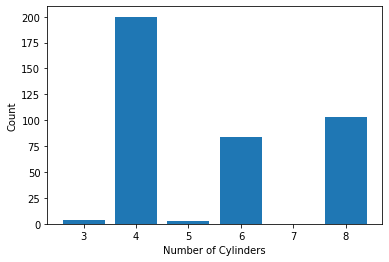

In [31]:
xvals = df.cylinder.unique()
yvals = [np.count_nonzero(df[df.cylinder == cyl_type].cylinder) for cyl_type in xvals]
plt.bar(xvals, yvals);
plt.ylabel('Count');
plt.xlabel('Number of Cylinders');

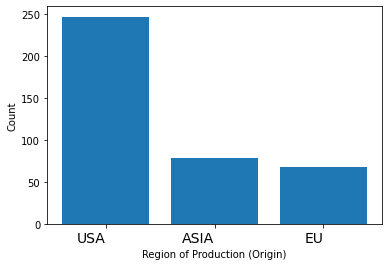

In [32]:
xvals = df.origin.unique()
yvals = [np.count_nonzero(df[df.origin == cyl_type].origin) for cyl_type in xvals]
plt.bar(xvals, yvals);
plt.ylabel('Count');
plt.xlabel('Region of Production (Origin)');
plt.xticks(xvals, fontweight='medium', fontsize='14', horizontalalignment='right')
plt.show()

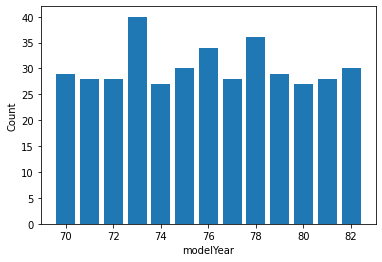

In [33]:
xvals = df["modelYear"].unique()
yvals = [np.count_nonzero(df[df["modelYear"] == year]["modelYear"]) for year in xvals]
plt.bar(xvals, yvals);
plt.ylabel('Count');
plt.xlabel('modelYear');
#plt.xticks(xvals, bars, fontweight='medium', fontsize='14', horizontalalignment='right')
plt.show()

<hr>

### Distribution for Numerical Features

<b>Reminder</b>: Interquartile Range

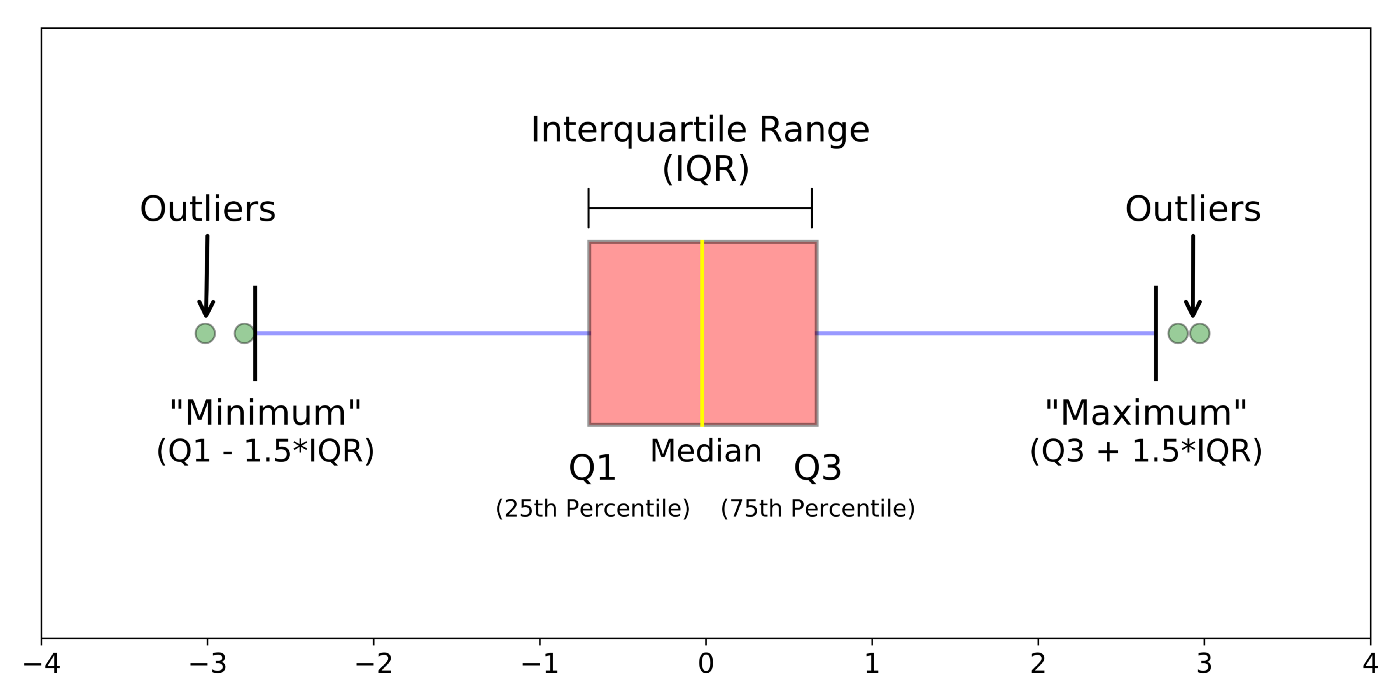

In [34]:
Image(filename = "boxplot.png")

Source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

<b>Commentary</b>:

We use histograms and boxplots to visualize the distribution of the numerical features in our dataset. 

We see that acceleration looks relatively normally distributed, while horsepower, displacement and weight all show varying levels of right-skewness. 

We see that horsepower and acceleration have some outliers. We deal with this below. 

We also examine mpg in more detail below.

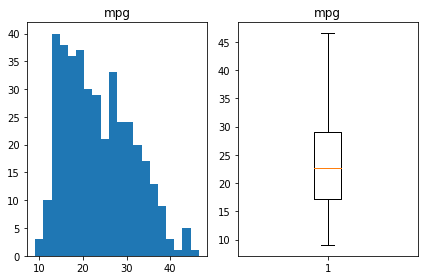

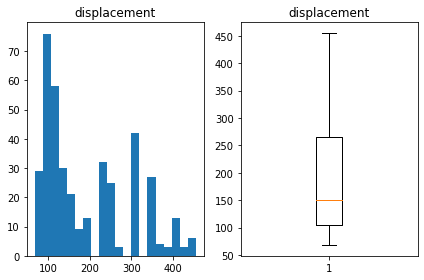

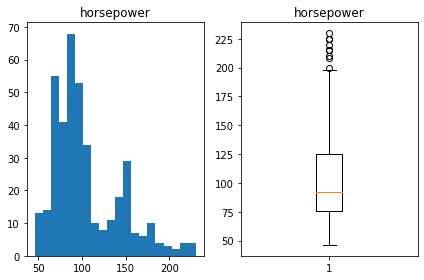

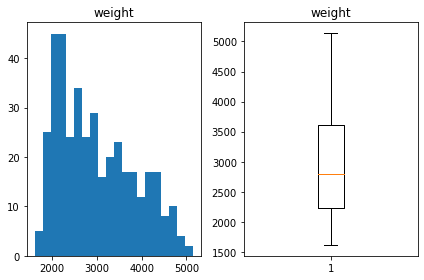

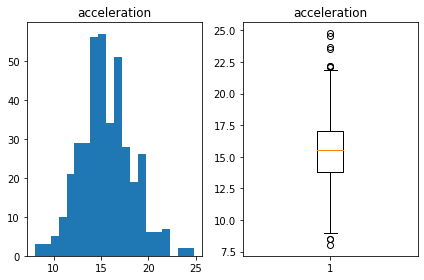

In [35]:
def plot_func(df, col):
  fig, ax = plt.subplots(nrows=1, ncols=2)
  ax[0].hist(df[col], bins = 20)
  ax[0].set_title(col)
  ax[1].boxplot(df[col])
  ax[1].set_title(col)
  fig.tight_layout()

cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

for col in cols:
    plot_func(df, col)

<hr>

### Outliers

<b>Commentary</b>:

Horsepower and acceleration have outlier data. We impute these outliers with the thresholds defined by:

- lower_threshold = quartile1_val - 1.5 * IQR
- upper_threshold = quartile3_val + 1.5 * IQR

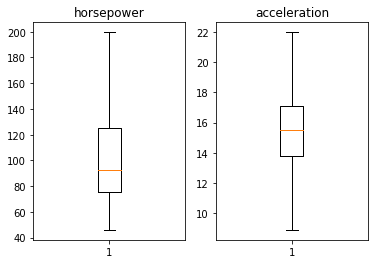

In [36]:
def obtain_thresholds(df, col, q1 = 0.25, q3 = 0.75):
    quartile1_val = df[col].quantile(q1)
    quartile3_val = df[col].quantile(q3)
    iqr = quartile3_val - quartile1_val
    upper_threshold = quartile3_val + 1.5 * iqr
    lower_threshold = quartile1_val - 1.5 * iqr
    return lower_threshold, upper_threshold

def replace_outliers_with_thresholds(df, col):
    lower_threshold, upper_threshold = obtain_thresholds(df, col)
    df.loc[(df[col] < lower_threshold), col] = lower_threshold
    df.loc[(df[col] > upper_threshold), col] = upper_threshold

cols = ['horsepower', 'acceleration']

for col in cols:
    replace_outliers_with_thresholds(df, col)

fig, ax = plt.subplots(nrows=1, ncols=2);
ax[0].boxplot(df['horsepower'])
ax[0].set_title('horsepower')
ax[1].boxplot(df['acceleration'])
ax[1].set_title('acceleration');


<hr>

### Check Normality of MPG

<b>Commentary</b>:

The Q-Q plot is a graphical method for comparing two probability distributions. By plotting their quantiles against each other, we can get a sense of how properties such as location, scale and skewness are similar or different in the two distributions. Q-Q plots are commonly used to compare a data set to a theoretical model. This can provide an assessment of "goodness of fit" that is graphical in nature.

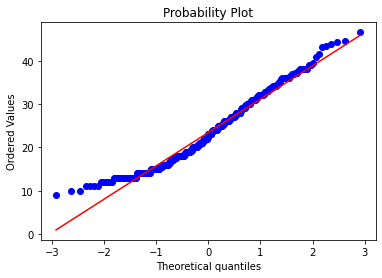

In [37]:
stats.probplot(df.mpg, dist="norm", plot=plt);

<b>Commentary</b>:

Now, we overlay the mpg data as a histogram on top of the normal distribution. When we draw repeated samples from our normally distributed continuous random variable, norm_rv, and plot the data according to norm_rv's PDF function, we see that the two plots, the histogram and the normal curve, do not completely agree with each other. This indicates that our empirical data is not totally normally distributed. 

However, we see that the data is almost normally distributed for vehicles with fuel efficiency approximately greater than 10 mpg.  We wouldn't really expect many cars to have lower fuel efficiency than that. Indeed, the car with the worst fuel efficiency in our dataset comes in at 9 mpg. We only deviate from the normal at the extreme left of our distribution—and this only occurs becuase we do not observe fuel efficiency close to 0 mpg. Mercifully!

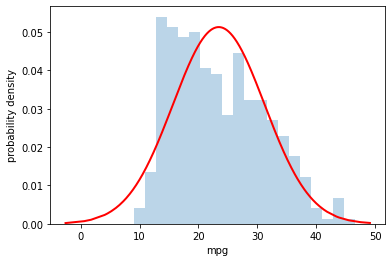

In [38]:
fig, ax = plt.subplots(1, 1)
norm_rv = norm(loc=np.mean(df.mpg), scale=np.std(df.mpg))

r = norm_rv.rvs(size=1000)  # draw samples
r = np.sort(r)  # sort them for correct plotting

ax.hist(df.mpg, density=True, histtype='stepfilled', bins = 20, alpha=0.3)
ax.plot(r, norm_rv.pdf(r), 'r-', lw=2, label='frozen pdf')
ax.set_xlabel("mpg")
ax.set_ylabel("probability density");

<hr>

### Correlation

#### Scatterplots for Numerical Data

<b>Commentary</b>:

Among other things, scatter plots can be useful in visualizing correlation between different features.

1. Negative Correlation
  - mpg-displacement, mpg-horsepower and mpg-weight 
    - this indicates that the larger the displacement, horsepower, or weight, the lower the mpg
2. Positive Correlation
  - mpg-acceleration 
    - positive correlation indicates that, in general, the greater the acceleration, the greater the mpg—and conversely, the lower the accelaration, the lower the mpg
    - for instance, we notice that cars with very low levels of acceleration tend to have lower mpg
   
    - this could be due to one or more confounding variables



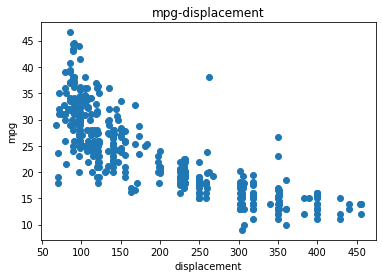

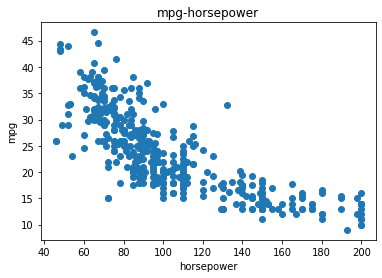

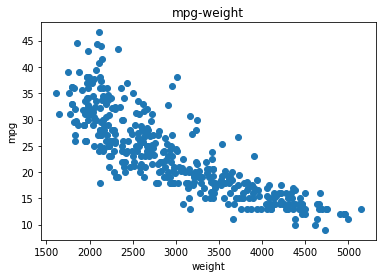

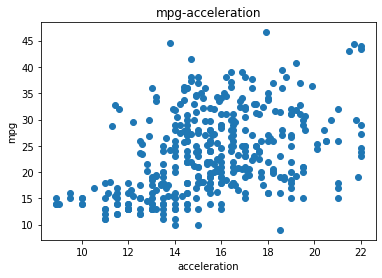

In [39]:
def plot_scatter(df, col, mpg):
  fig, ax = plt.subplots(nrows=1, ncols=1)
  print(ax.scatter(df[col], mpg))
  ax.set_title('mpg-'+col)
  ax.set_xlabel(col)
  ax.set_ylabel('mpg')
  plt.show()

cols = ['displacement', 'horsepower', 'weight', 'acceleration']

mpg = df.mpg
for col in cols:
    plot_scatter(df, col, mpg)

<b>Commentary</b>:

  - The correlation between mpg-acceleration is not as strong as the correlation between mpg-displacement, mpg-horsepower and mpg-weight respectively
  - Cars with lower levels of acceleration tend to have lower mpg
  - Cars with higher levels of displacement, horsepower and weight tend to have lower mpg
  - If cars with higher levels of displacement, horsepower and weight also tend to have lower levels of acceleration, it might be reasonable to assume one or more of these factors is the dominant factor affecting mpg, rather than acceleration itself
  - Clearly, more analysis is needed as we have not considered other features such as model-year and cylinder
  - We use a correlation matrix below to check our intuition

#### Correlation Matrix

In [40]:
corr = df.corr()
corr.style.background_gradient(cmap='RdYlGn')

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear
mpg,1.000000,-0.777334,-0.804624,-0.789245,-0.831271,0.420437,0.578623
cylinder,-0.777334,1.000000,0.950842,0.853814,0.897491,-0.510145,-0.341809
displacement,-0.804624,0.950842,1.000000,0.900629,0.933093,-0.550625,-0.365373
horsepower,-0.789245,0.853814,0.900629,1.000000,0.875332,-0.696549,-0.410472
weight,-0.831271,0.897491,0.933093,0.875332,1.000000,-0.424631,-0.303887
acceleration,0.420437,-0.510145,-0.550625,-0.696549,-0.424631,1.000000,0.282624
modelYear,0.578623,-0.341809,-0.365373,-0.410472,-0.303887,0.282624,1.000000


<b>Note</b>: Our intuition seems to be confirmed. More analysis is needed.

<hr>
<hr>



# Regression, Results and Analysis

### Backward Stepwise Selection

<b>Commentary</b>: 

We use the deterministic backward selection procedure to choose a model. 

We start with all variables in the model, and iteratively
remove the variable with the largest p-value—that is, the variable selection that is the least statistically significant. The new (p − 1)-variable model is fit, and the new variable with the largest p-value is again removed. This
procedure continues until all variables in the model have p-value < 0.05.

In [41]:
# Backward Stepwise Procedure
features = ['weight', 'horsepower', 'displacement', 'cylinder', 'acceleration', 'modelYear']
lower_thresh = 0.05

for num in range(len(features)):
    max_pval = None
    max_pval_index = None
    reg_formula = f'mpg ~ {" + ".join(features)}'
    print('\n', reg_formula, '\n')
    linear = smf.ols(reg_formula, df).fit()

    list_indices = [index for index in linear.pvalues.index]
    list_pvals = [pval for pval in linear.pvalues]
    list_indices.remove('Intercept')  # we won't be droppping the intercept
    list_pvals.remove(linear.pvalues['Intercept'])
    zip_indices_pvals = zip(list_indices, list_pvals)

    for index, pval in zip_indices_pvals:
      if max_pval is None or (pval > lower_thresh and pval > max_pval): 
        max_pval = pval
        max_pval_index = index
    print(linear.summary())

    if max_pval > lower_thresh:
      print('\n', 'REMOVE', max_pval_index)
      features.remove(max_pval_index)
    else:
      break


 mpg ~ weight + horsepower + displacement + cylinder + acceleration + modelYear 

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     273.6
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          7.51e-136
Time:                        15:20:52   Log-Likelihood:                -1040.8
No. Observations:                 394   AIC:                             2096.
Df Residuals:                     387   BIC:                             2124.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

### Graph—Simple Linear Regression Model


$mpg$ ~ $weight+modelYear$

Model params are: -14.506896810597445 -0.006626333043669145 0.7591121520660069


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


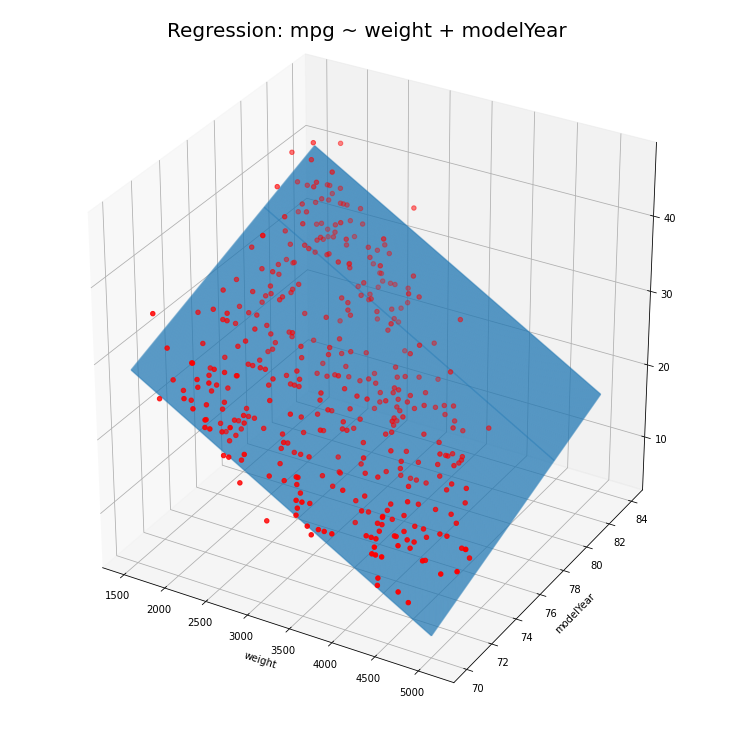

In [42]:
beta0, beta_weight, beta_modelYear = linear.params
print('Model params are:', beta0, beta_weight, beta_modelYear)

modelYear = np.arange(70, 85)
weight = np.arange(1500, 5000)

B1, B2 = np.meshgrid(weight, modelYear, indexing='xy')
Z = np.zeros((modelYear.size, weight.size))

for (i,j),v in np.ndenumerate(Z):
  Z[i,j] = (beta0 + B1[i,j]*beta_weight + B2[i,j]*beta_modelYear)

fig = plt.figure(figsize=(10,10))
fig.suptitle('Regression: mpg ~ weight + modelYear', fontsize=20)

ax = Axes3D(fig)
ax.plot_wireframe(B1, B2, Z, rstride=10, cstride=5, alpha =0.4)
ax.scatter3D(df.weight, df.modelYear, df.mpg, c='r' )

ax.set_xlabel('weight')
ax.set_ylabel('modelYear');

### Diagnositc Plots—Simple Linear Regression Model

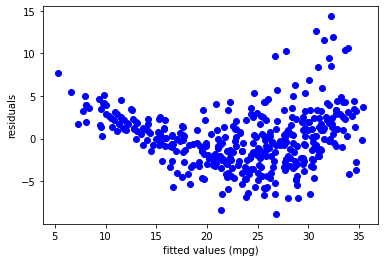

In [43]:
plt.plot(linear.fittedvalues, linear.resid, 'bo')
plt.xlabel('fitted values (mpg)')
plt.ylabel('residuals');

<b>Commentary</b>:

The residual-fit diagnostic plot intuitively asks, for different fitted values, does the quality of our fit change?

From this plot, we can investigate if:
1. Homoskedasticity holds. The spread of residuals should be approximately the same across the x-axis
2. There are outliers. Do we have extreme residuals that are located far from the rest?
3. The model fits the data well. Where the residuals are all 0, the model predicts perfectly. The further residuals are from 0, the less accurate the model.

At the higher end of the fitted values (where the predicted mpg is higher) the variance of the residuals increases significantly. This indicates that homoskedasticity does not hold and that our fit is not very good.

<b>Commentary</b>:

One of the assumptions of the linear regression model is that the residuals are normally distributed. 

Let's use a QQ-plot to investigate the distribution of the residuals in our model.

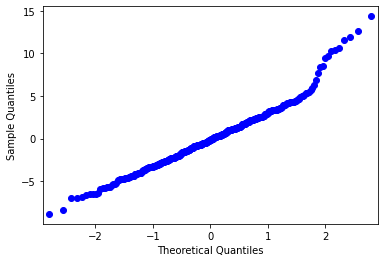

In [44]:
sm.qqplot(linear.resid);

<b>Commentary</b>:

Where mpg is predicted to be high, the residuals deviate from the normal. 

The assumption of normality of residuals is violated. This indicates the model may produce unreliable results.

<hr>

### Polynomial Regression Model

<b>Commentary</b>:

Let's attempt to improve on the previous model by adding a quadratic term. 

We produce OLS Regression Result for the polynomial model.

$mpg$ ~ $modelYear + weight + weight^2$

In [45]:
polynomial = smf.ols('mpg ~ modelYear + weight + np.power(weight,2)', df).fit()
polynomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     737.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          2.46e-160
Time:                        15:20:55   Log-Likelihood:                -993.21
No. Observations:                 394   AIC:                             1994.
Df Residuals:                     390   BIC:                             2010.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.9014      3.851      0.494      0.622      -5.670       9.473
modelYear               0.8310      0.044     18.879      0.000       0.744       0.918
weight                 -0.0215      0.001    -14.995      0.000      -0.024      -0.019
np.power(weight, 2)  2.344e-06   2.24e-07     10.468      0.000     1.9e-06    2.78e-06
==============================================================================
Omnibus:                       69.832   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.720
Skew:                           0.876   Prob(JB):                     5.15e-38
Kurtosis:                       5.718   Cond. No.                     2.78e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Commentary</b>:

Using the polynomial model, the $R^2$ increased from 0.808 to 0.850. 

So this model explains a larger percent of the variance than did the previous simple linear model.

### Diagnositic Plots—Polynomial Regression Model

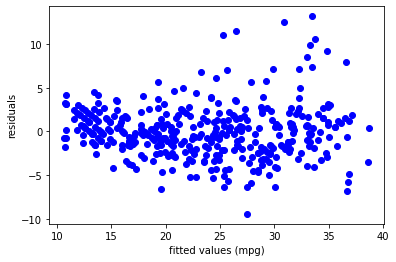

In [46]:
plt.plot(polynomial.fittedvalues, polynomial.resid, 'bo')
plt.xlabel('fitted values (mpg)')
plt.ylabel('residuals');

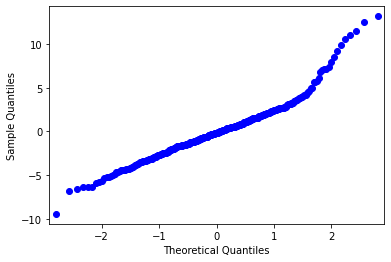

In [47]:
sm.qqplot(polynomial.resid);

<hr>

### Log-Log Polynomial Model

<b>Commentary</b>:

Let's take log-log of the polynomial model to handle the observed heteroskedascity and non-normality of the residuals.






<b>Note</b>:

Since:

$log(y) = \beta_0 + \beta_1 * log(modelYear) + 
\beta_2*log(weight) + \beta_3*log(weight^2)$

Then:

$ y = e^{\beta_0} + e^{\beta_1 * log(modelYear)} + e^{\beta_2 * log(weight)} + e^{\beta_3*log(weight^2)}$

In [48]:
loglog = smf.ols('np.log(mpg)~np.log(modelYear)+np.log(weight)+np.log(np.power(weight,2))', df).fit()
loglog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1430.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          1.53e-180
Time:                        15:20:56   Log-Likelihood:                 284.59
No. Observations:                 394   AIC:                            -563.2
Df Residuals:                     391   BIC:                            -551.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.1930      0.625     -0.309      0.758      -1.421       1.035
np.log(modelYear)               2.4797      0.128     19.427      0.000       2.229       2.731
np.log(weight)                 -0.1871      0.004    -42.407      0.000      -0.196      -0.178
np.log(np.power(weight, 2))    -0.3741      0.009    -42.407      0.000      -0.391      -0.357
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               17.697
Skew:                           0.033   Prob(JB):                     0.000144
Kurtosis:                       4.036   Cond. No.                     1.52e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<b>Commentary</b>:

Using the log-log model, the $R^2$ increased from 0.850 to 0.880—a modest improvement over the polynomial model.

<b>Commentary</b>:

We are unable to plot the regression as we have three independent variables and would need a four-dimensional plot. 

However, we can plot some diagnostic plots for the model.

### Diagnostic Plots—Log-Log Model


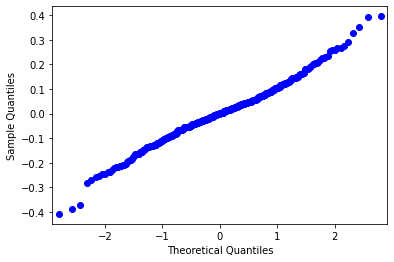

In [49]:
sm.qqplot(loglog.resid);

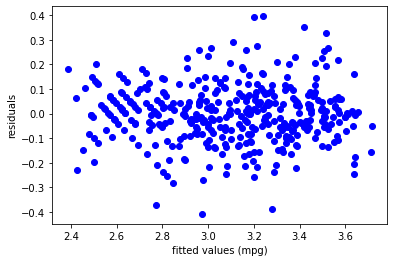

In [50]:
plt.plot(loglog.fittedvalues, loglog.resid, 'bo')
plt.xlabel('fitted values (mpg)')
plt.ylabel('residuals');

<b>Commentary</b>:

We have achieved normality and homoskedasticity of residuals. 

These are basic assumptions of the linear model.

Now, we have can have more confidence in the predictive accuracy of our model.

### High Leverage Data

<b>Commentary</b>:

High leverage points are data values that are extreme in their x-value relative to the other data. 

High leverage points can potentially affect the slope of the regression line—and thus, the predicted value of the dependent variable.

Do we have any high leverage points in our dataset?

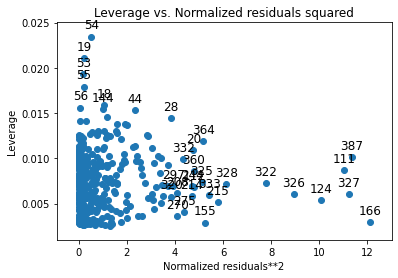

In [51]:
sm.graphics.plot_leverage_resid2(loglog, alpha=0.05);

In [52]:
df.iloc[[19,53,54,55]]

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
19,26.0,4,97.0,46.0,1835.0,20.5,70,EU,volkswagen,1131 deluxe sedan
53,31.0,4,71.0,65.0,1773.0,19.0,71,ASIA,toyota,corolla 1200
54,35.0,4,72.0,69.0,1613.0,18.0,71,ASIA,datsun,1200
55,27.0,4,97.0,60.0,1834.0,19.0,71,EU,volkswagen,model 111


In [53]:
print('Average weight :', df.weight.mean())

Average weight : 2974.959390862944


<b>Commentary</b>:

Each of the data points above have values in the $weight$ column that are significantly lower than the average for the dataset. 

Let's drop them and re-run our model.

<hr>

In [54]:
dfcopy = df.copy()
dfcopy = dfcopy.drop([19,53,54,55])

In [55]:
model = smf.ols('np.log(mpg)~np.log(modelYear)+np.log(weight)+np.log(np.power(weight,2))', dfcopy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1406.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          3.16e-178
Time:                        15:20:57   Log-Likelihood:                 280.29
No. Observations:                 390   AIC:                            -554.6
Df Residuals:                     387   BIC:                            -542.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.2157      0.647     -0.333      0.739      -1.488       1.056
np.log(modelYear)               2.4830      0.131     18.964      0.000       2.226       2.740
np.log(weight)                 -0.1868      0.005    -41.096      0.000      -0.196      -0.178
np.log(np.power(weight, 2))    -0.3737      0.009    -41.096      0.000      -0.392      -0.356
==============================================================================
Omnibus:                        9.516   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               16.853
Skew:                           0.034   Prob(JB):                     0.000219
Kurtosis:                       4.016   Cond. No.                     5.18e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.9e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<b>Commentary</b>:

We've reduced the number of high leverage points. However, our $R^2$ decreased slightly from 0.880 to 0.879. 

Since the high leverage points had low-residuals, their influence is likely not great.

Let's try instead to drop data at index 28, as it has both high leverage and high residual

In [56]:
dfcopy2 = df.copy()
dfcopy2 = dfcopy2.drop([28])

In [57]:
model = smf.ols('np.log(mpg)~np.log(modelYear)+np.log(weight)+np.log(np.power(weight,2))', dfcopy2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1413.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          2.20e-179
Time:                        15:20:58   Log-Likelihood:                 285.32
No. Observations:                 393   AIC:                            -564.6
Df Residuals:                     390   BIC:                            -552.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.1500      0.623     -0.241      0.810      -1.375       1.075
np.log(modelYear)               2.4643      0.127     19.341      0.000       2.214       2.715
np.log(weight)                 -0.1864      0.004    -42.321      0.000      -0.195      -0.178
np.log(np.power(weight, 2))    -0.3729      0.009    -42.321      0.000      -0.390      -0.356
==============================================================================
Omnibus:                       10.512   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               19.508
Skew:                           0.041   Prob(JB):                     5.81e-05
Kurtosis:                       4.088   Cond. No.                     1.49e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.98e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<b>Commentary</b>:

Again we've reduced our $R^2$ slightly from 0.880 to 0.879. 

Hence, we return to the log-log model with $R^2$ of 0.880

In [58]:
loglog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1430.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          1.53e-180
Time:                        15:20:58   Log-Likelihood:                 284.59
No. Observations:                 394   AIC:                            -563.2
Df Residuals:                     391   BIC:                            -551.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.1930      0.625     -0.309      0.758      -1.421       1.035
np.log(modelYear)               2.4797      0.128     19.427      0.000       2.229       2.731
np.log(weight)                 -0.1871      0.004    -42.407      0.000      -0.196      -0.178
np.log(np.power(weight, 2))    -0.3741      0.009    -42.407      0.000      -0.391      -0.357
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               17.697
Skew:                           0.033   Prob(JB):                     0.000144
Kurtosis:                       4.036   Cond. No.                     1.52e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<hr>

### Multicollinearity

<b>Commentary</b>:

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable predicts the dependent variable in a statistical model.

In general, multicollinearity can lead to wider confidence intervals that produce less reliable probabilities in terms of the effect of independent variables in a model.

Source: https://www.investopedia.com/terms/m/multicollinearity.asp



Why can't we just examine our covariance matrix from earlier? 

The problem is a covariance matrix only tells us how two variables are related. 

Often we have more than two independent variables $X_1, X_2, \dots X_n$ and we want to know how $X_1$ is related to all other independent variables in the model. 

In such a case, we compute the variance inflation factor $\left(VIF\right)$. 

The $VIF$ is a measure of how well how well the variance of a particular variable is explained by the other variables in the model. 

That is, $VIF$ provides a measure of multicollinearity among the independent variables in a multiple regression model.







If we have a high value of $VIF \dots$ typically $VIF > 5$, we can safely remove that variable from the model. 

The variance inflation factor for $X_1$ can be computed by:

$VIF_1 = \frac{1}{1 - R^2_1}$ $\quad$where $R^2_1$ comes from the regression:

$X_1 = \beta_0 + \beta_1 X_2 + \dots + \beta_n X_n $

Let's begin by checking the $VIF$ for the simple linear model, our base model.

$mpg$ ~ $weight + modelYear$

In [59]:
# linear
# use patsy, dmatrices
# use statsmodels, variance inflation factor

#find design matrix for linear regression model using 'mpg' as response variable 
y, X = dmatrices('mpg~weight+modelYear', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,532.651315,Intercept
1,1.101743,weight
2,1.101743,modelYear


<b>Commentary</b>:

We have $VIF$ of just $1.101$. This indicates a low level of multicollinearity between $weight$ and $modelYear$.

Let's perform the same operation for the polynomial model.

$mpg$ ~ $modelYear + weight + weight^2$

In [60]:
# polynomial

#find design matrix for linear regression model using 'mpg' as response variable 
y, X = dmatrices('mpg~modelYear + weight + np.power(weight,2)', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,638.425522,Intercept
1,1.129207,modelYear
2,63.655238,weight
3,64.377582,"np.power(weight, 2)"


<b>Commentary</b>:

Now, we have a very large values of $VIF$ for $weight$ and $weight^2$.

This is to be expected $\dots$ after all, an increase in $weight$, will obviously be correlated heavily with an increase in $weight^2$. 



When introducing polynomial terms in a model, we introduce what is known as structural multicollinearity. 

The neat thing here is that we can reduce the multicollinearity in our data by doing what is known as "centering the predictors." Centering a predictor merely entails subtracting the mean of the predictor values from each individual predictor value. 

Source: https://online.stat.psu.edu/stat501/lesson/12/12.6



Let's do that now.

In [61]:
df_centered = df.copy()

mean_weight = df.weight.mean()
print('Average weight', mean_weight)

Average weight 2974.959390862944


In [62]:
df.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick,skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth,satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc,rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford,torino


In [63]:
df_centered.weight = df_centered.weight - mean_weight  # centering the predictor
df_centered.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelYear,origin,make,model
0,18.0,8,307.0,130.0,529.040609,12.0,70,USA,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,718.040609,11.5,70,USA,buick,skylark 320
2,18.0,8,318.0,150.0,461.040609,11.0,70,USA,plymouth,satellite
3,16.0,8,304.0,150.0,458.040609,12.0,70,USA,amc,rebel sst
4,17.0,8,302.0,140.0,474.040609,10.5,70,USA,ford,torino


<b>Commentary</b>:

Now, let's compute the VIF for our centered polynomial model.

$mpg$ ~ $modelYear + weight + weight^2$

In [64]:
# polynomial - centered weight
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'mpg' as response variable 
y, X = dmatrices('mpg~modelYear + weight + np.power(weight,2)', data=df_centered, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,490.587029,Intercept
1,1.129207,modelYear
2,1.352634,weight
3,1.328807,"np.power(weight, 2)"


<b>Commentary</b>:

We have reduced the VIF considerably!

How does the model's goodness of fit change after centering the weight predictor?

Let's begin by returning to the polynomial regression model prior to centering.

In [65]:
polynomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     737.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          2.46e-160
Time:                        15:20:58   Log-Likelihood:                -993.21
No. Observations:                 394   AIC:                             1994.
Df Residuals:                     390   BIC:                             2010.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.9014      3.851      0.494      0.622      -5.670       9.473
modelYear               0.8310      0.044     18.879      0.000       0.744       0.918
weight                 -0.0215      0.001    -14.995      0.000      -0.024      -0.019
np.power(weight, 2)  2.344e-06   2.24e-07     10.468      0.000     1.9e-06    2.78e-06
==============================================================================
Omnibus:                       69.832   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.720
Skew:                           0.876   Prob(JB):                     5.15e-38
Kurtosis:                       5.718   Cond. No.                     2.78e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Commentary</b>:

Let's see how the centered polynomial model compares.

In [66]:
polynomial_centered = smf.ols('mpg ~ modelYear + weight + np.power(weight,2)', df_centered).fit()
polynomial_centered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     737.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          2.46e-160
Time:                        15:20:58   Log-Likelihood:                -993.21
No. Observations:                 394   AIC:                             1994.
Df Residuals:                     390   BIC:                             2010.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -41.3617      3.376    -12.252      0.000     -47.999     -34.725
modelYear               0.8310      0.044     18.879      0.000       0.744       0.918
weight                 -0.0076      0.000    -36.189      0.000      -0.008      -0.007
np.power(weight, 2)  2.344e-06   2.24e-07     10.468      0.000     1.9e-06    2.78e-06
==============================================================================
Omnibus:                       69.832   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.720
Skew:                           0.876   Prob(JB):                     5.15e-38
Kurtosis:                       5.718   Cond. No.                     2.36e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Commentary</b>:

The centered polynomial model has identical $R^2$ and $adjusted$ $R^2$ as the uncentered polynomial model.

Hence, we significantly reduced multicollinearity $\dots$ while maintaining our model's goodness of fit.

<b>Commentary</b>:

Let's compute $VIF$ for the uncentered log-log model.

$log(mpg)$ ~ $log(modelYear) + log(weight) + log(weight^2)$

In [67]:
# log-log

#find design matrix for linear regression model using 'np.log(mpg)' as response variable 
y, X = dmatrices('np.log(mpg)~np.log(weight) + np.log(np.power(weight,2)) + np.log(modelYear)', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,variable
0,1.105398e+04,Intercept
1,inf,np.log(weight)
2,inf,"np.log(np.power(weight, 2))"
3,1.084693e+00,np.log(modelYear)


<b>Commentary</b>:

Now, let's compute $VIF$ for the centered log-log model.

$log(mpg)$ ~ $log(modelYear) + log(weight) + log(weight^2)$

In [68]:
# loglog - centered weight

#find design matrix for linear regression model using 'np.log(mpg)' as response variable 
y, X = dmatrices('np.log(mpg)~np.log(weight) + np.log(np.power(weight,2)) + np.log(modelYear)', data=df_centered, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,variable
0,1.188115e+04,Intercept
1,inf,np.log(weight)
2,inf,"np.log(np.power(weight, 2))"
3,1.093711e+00,np.log(modelYear)


<b>Commentary</b>:

The centering procedure did not reduce $VIF$ in the log-log model. 

That is, $VIF$ is $infinity$ for $log(weight)$ and $log(weight^2)$ in both the centered and the uncentered log-log models.

Note, however, that the centering procedure did reduce $VIF$ in the polynomial model.  

Let's investigate further.






Going back to our formula:

$VIF = \frac{1}{1 - R^2_i}$

We must have $R^2_1 = 1$

Let's run the following regression to confirm:

$log(weight)$ ~ $log(weight^2)+log(modelYear)$

In [69]:
model = smf.ols('np.log(weight)~np.log(np.power(weight, 2))+np.log(modelYear)', df_centered).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(weight)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.214e+27
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:20:59   Log-Likelihood:                 4781.8
No. Observations:                 170   AIC:                            -9558.
Df Residuals:                     167   BIC:                            -9548.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.599e-13   1.24e-12     -0.129      0.898   -2.61e-12    2.29e-12
np.log(np.power(weight, 2))     0.5000    5.7e-15   8.78e+13      0.000       0.500       0.500
np.log(modelYear)             2.22e-15   2.82e-13      0.008      0.994   -5.55e-13     5.6e-13
==============================================================================
Omnibus:                       15.914   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.053
Skew:                           0.545   Prob(JB):                     9.86e-06
Kurtosis:                       4.437   Cond. No.                     1.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Commentary</b>:

We have $R^2_1 = 1$.

Therefore, 100% of the variance in $weight$ is determined by one—or both of—$log(weight^2)$ and $log(modelYear)$. 


We suspect the culprit is $log(weight^2)$. 

Let's run the following regression to confirm:



$log(weight)$ ~ $log(weight^2)$

In [70]:
model = smf.ols('np.log(weight)~np.log(np.power(weight, 2))', df_centered).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(weight)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.226e+30
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:20:59   Log-Likelihood:                 5376.1
No. Observations:                 170   AIC:                        -1.075e+04
Df Residuals:                     168   BIC:                        -1.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     4.33e-15   2.13e-15      2.033      0.044    1.25e-16    8.53e-15
np.log(np.power(weight, 2))     0.5000   1.65e-16   3.04e+15      0.000       0.500       0.500
==============================================================================
Omnibus:                      236.588   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10404.758
Skew:                          -6.108   Prob(JB):                         0.00
Kurtosis:                      39.327   Cond. No.                         80.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Commentary</b>:

Again, we have $R^2_1 = 1$.

Therefore, 100% of the variation in $log(weight)$ is in fact determined by $log(weight^2)$



Does this make sense? To be honest, I am not sure. 

Future classes in machine learning may help to clarify this point. 



For now, I would speculate that because:

$log(weight^2) = 2log(weight)$. 



Our model:

$log(mpg)$ ~ $log(modelYear) + log(weight) + log(weight^2)$





becomes:

$log(mpg)$ ~ $log(modelYear) + log(weight) + 2log(weight)$


Then, it might be reasonable to suspect that $log(weight)$ and $2log(weight)$ are perfectly linearly correlated with one another.

Hence, $VIF$ of $infinity$ might make sense for this model.



Clearly more research on the topic is required!

<b>Commentary</b>:

We know there appears to be extreme multicollinearity in the centered and uncentered log-log models. 

In the uncentered log-log model we have $R^2 = 0.880$.

Let's examine our goodness of fit for the centered log-log model.

In [71]:
loglog_centered = smf.ols('np.log(mpg) ~ np.log(modelYear) + np.log(weight) + np.log(np.power(weight, 2))', df_centered).fit()
loglog_centered.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     152.7
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           1.98e-38
Time:                        15:20:59   Log-Likelihood:                 101.42
No. Observations:                 170   AIC:                            -196.8
Df Residuals:                     167   BIC:                            -187.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -8.7164      1.124     -7.755      0.000     -10.935      -6.497
np.log(modelYear)               2.8174      0.256     11.023      0.000       2.313       3.322
np.log(weight)                 -0.0201      0.002     -9.738      0.000      -0.024      -0.016
np.log(np.power(weight, 2))    -0.0402      0.004     -9.738      0.000      -0.048      -0.032
==============================================================================
Omnibus:                        0.751   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.449
Skew:                          -0.094   Prob(JB):                        0.799
Kurtosis:                       3.167   Cond. No.                     8.39e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.51e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<b>Commentary</b>:

Our $R^2$ actually dropped significantly in the centered log-log model. 

Moreover, the centered log-log model has features with $infinite$ $VIF$—seemingly indicating an extreme degree of multicollinearity. 

Given the above, the safe choice would be to return to the centered polynomial model, which produced low $VIF$ and high $R^2$

In [72]:
polynomial_centered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     737.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          2.46e-160
Time:                        15:20:59   Log-Likelihood:                -993.21
No. Observations:                 394   AIC:                             1994.
Df Residuals:                     390   BIC:                             2010.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -41.3617      3.376    -12.252      0.000     -47.999     -34.725
modelYear               0.8310      0.044     18.879      0.000       0.744       0.918
weight                 -0.0076      0.000    -36.189      0.000      -0.008      -0.007
np.power(weight, 2)  2.344e-06   2.24e-07     10.468      0.000     1.9e-06    2.78e-06
==============================================================================
Omnibus:                       69.832   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.720
Skew:                           0.876   Prob(JB):                     5.15e-38
Kurtosis:                       5.718   Cond. No.                     2.36e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
rsqResults = pd.DataFrame()
rsqResults['Model'] = ['Simple Linear Regression', 'Polynomial Regression', 'Centered Polynomial Regression', 'Log-Log Polynomial', 'Centered Log-Log Polynomial']
rsqResults['R^2'] = [0.808, 0.850, 0.850, 0.880, 0.646]
rsqResults['Adj R^2'] = [0.807, 0.849, 0.849, 0.879, 0.642]

In [74]:
vifResults = pd.DataFrame()
vifResults['Feature'] = ['weight', 'weight^2', 'modelYear']
vifResults['VIF—Simple'] = [1.101743, 'NAN', 1.101743]
vifResults['VIF—Polynomial'] = [63.655238, 64.377582, 1.129207]
vifResults['VIF—Centered Polynomial'] = [1.352634, 1.328807, 1.129207]
vifResults['VIF—Log-Log Polynomial'] = ['inf', 'inf', 1.084693]
vifResults['VIF—Centered Log-Log Polynomial'] = ['inf', 'inf', 1.0937111]

# Conclusion

We sought to better understand the impact that particular features have on the fuel-efficiency of vehicles, with an eye toward mitigating the harmful effects of climate change. Through basic exploratory data analysis, we showed that:
- Cars produced in Asia tend to weigh less and have better fuel-efficieny than their US and EU counterparts. 
- Cars having higher levels of displacement, horsepower and weight tend to have worse fuel-efficiency. 
- Cars having lower levels of acceleration tend to have worse fuel-efficiency.







We used the deterministic backward stepwise selection procedure to decide which features to include in our base simple linear regression model. The outcome of this procedure was the model: 

- $mpg$ ~ $modelYear + weight$
 


 

Hence, the age and the weight of the car seem to explain the largest proportion of the variance in fuel-efficiency, measured in mpg.

We improved our base model with polynomial regression and log-log regression models.

In [75]:
rsqResults


,Model,R^2,Adj R^2
0,Simple Linear Regression,0.808,0.807
1,Polynomial Regression,0.850,0.849
2,Centered Polynomial Regression,0.850,0.849
3,Log-Log Polynomial,0.880,0.879
4,Centered Log-Log Polynomial,0.646,0.642


Finally, we computed $VIF$ for each model to identify any  problematic multicollinearity in the models. 

In [76]:
vifResults

,Feature,VIF—Simple,VIF—Polynomial,VIF—Centered Polynomial,VIF—Log-Log Polynomial,VIF—Centered Log-Log Polynomial
0,weight,1.101743,63.655238,1.352634,inf,inf
1,weight^2,NAN,64.377582,1.328807,inf,inf
2,modelYear,1.101743,1.129207,1.129207,1.084693,1.093711


The log-log model had highest $R^2$, while the centered log-log model's $R^2$ dropped significantly.


There appears to be extreme multicollinearity in both the centered and uncentered cases.


It's not clear why the centering procedure did not eliminate the multicollinearity in the log-log model.










We speculate that it might be due to the fact that $log(weight^2) = 2log(weight)$. 

So the model:

$log(mpg)$ ~ $log(modelYear) + log(weight) + log(weight^2)$

becomes:

$log(mpg)$ ~ $log(modelYear) + log(weight) + 2log(weight)$




Then, it might be reasonable to suspect that $log(weight)$ and $2log(weight)$ are perfectly linearly correlated with one another.

Based on this analysis, we chose to revert back to our centered polynomial model—as it had low $VIF$ and high $R^2$

# Further Improvements

The reason we took log-log of the polynomial model in the first place was to deal with the non-normality and heteroskedasticity of residuals. 

Given that we've reverted back to our polynomial model, these issues still remain. 

To handle this, we might simply introduce a second model. 

That is, we could use our current polynomial model for the observations where the residuals are normally distributed and relatively homoskedastic. 

Then, we could introduce a second model for those observations where the predicted mpg is high, and the corresponding residuals show lots of variation around the predicted value (for the current polynomial model).

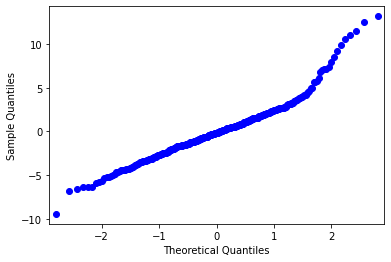

In [77]:
sm.qqplot(polynomial_centered.resid);

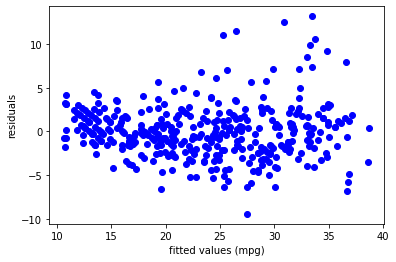

In [78]:
plt.plot(polynomial_centered.fittedvalues, polynomial_centered.resid, 'bo')
plt.xlabel('fitted values (mpg)')
plt.ylabel('residuals');